<a id="0"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:250%;text-align:center;border-radius:10px 10px;">LearningRateScheduler</p>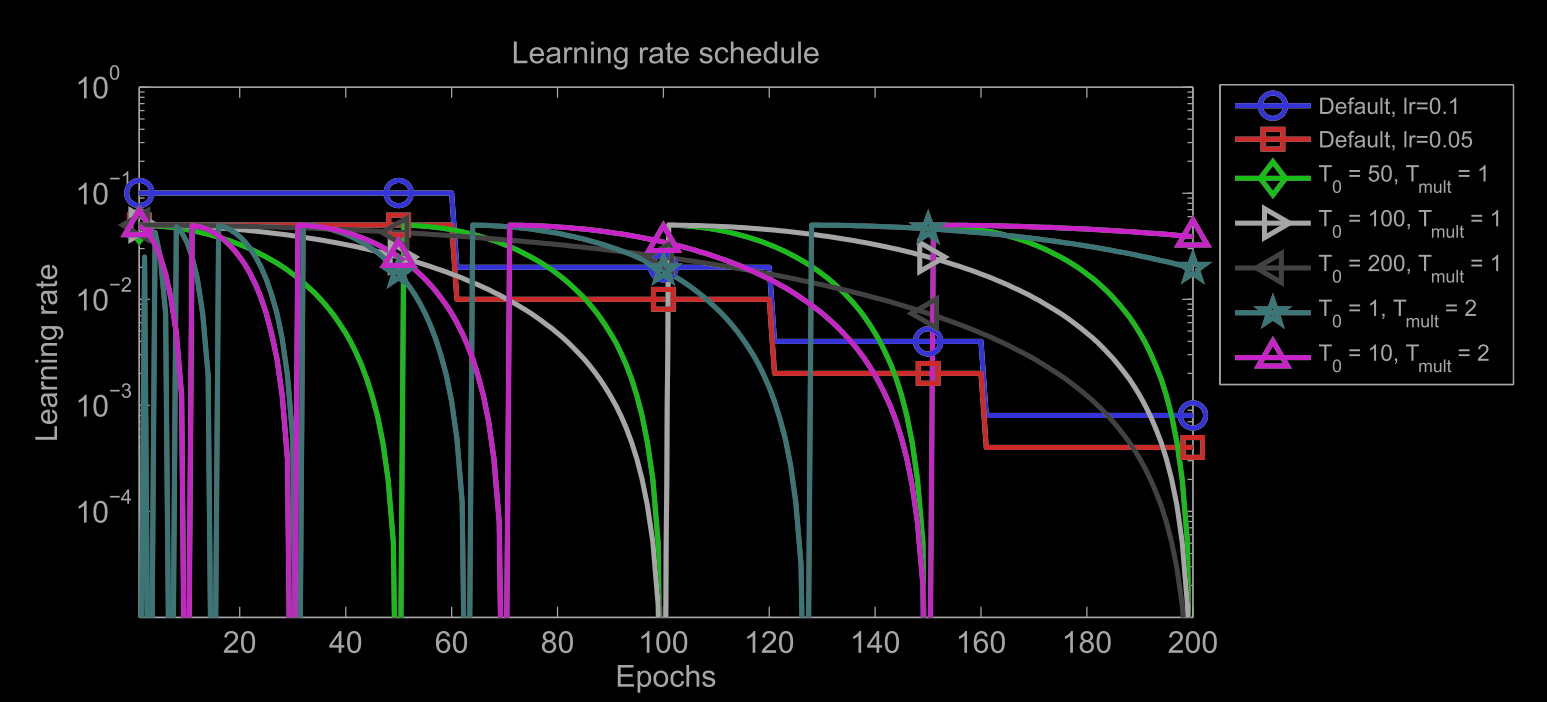
<a id="0"></a>
<p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:250%;text-align:center;border-radius:10px 10px;">Introduction</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">In this notebook we will look at different kinds of LearningRateScheduler and visualize them. We will also try to understand their benefits.</p>
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Table of Contents</p>   
    
* [1. Why we need LearningRateScheduler?](#1)

* [2. How to implement in Keras?](#2)
    
* [3. Simple Decay](#3)

* [4. Cosine Decay Learning Rate](#4)
    
* [5. Exponential Decay Learning Rate](#5)    

* [6. Something Interesting](#6)
    
* [7. Damped Cosine Decay Learning Rate](#7)
    
* [8. Damped Exponential Decay Learning Rate](#8)  
    
* [9. Conclusion](#9)
    
* [10. End](#10)


<a id="1"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">1.Why we need LearningRateScheduler?</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">
Using constant learning rate for whole training has many disadvantages. If our data set is highly differentiated, we can suffer from a sort of "early over-fitting". If our shuffled data happens to include a cluster of related, strongly-featured observations, our model's initial training can skew badly toward those features -- or worse, toward incidental features that aren't truly related to the topic at all.<br>
Using Some kind of scheduler which changes learning rate during training helps generalize the model and thus it performs better on the test set.<br>
So on an average it is always recommended to use some kind of learning rate scheduler.In this notebook we will try to explore these learning rate schedulers.</p>

<a id="2"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">2.How to implement in Keras?</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">We define a function schedule which is called in the start of every epoch.<br>
    This function(schedule) takes in two parameters current epoch and current learning rate. It returns modified learning rate<br>
Verbose sets how much to display.</p>


In [ ]:
import numpy as np 
import math
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns

<code>def schedule(epoch, lr):
<code>    # epoch:- current epoch 
<code>    # lr:- current learning rate 
<code>    ..
<code>    modified_lr = ..
<code>    return modified_lr 
<code>
<code>lr= tf.keras.callbacks.LearningRateScheduler(schedule, verbose=0)
<code>callbacks = [lr, ...] 
<code>model.fit(.... , callbacks= callbacks)

<a id="3"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">3.Simple Decay</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">It keeps same learning rate for first k many epochs(here 10) and then it exponentially decreases learning rate at each epoch.</p>

In [ ]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:
modified_lr = []
lr = 0.1
for e in range(50):
    lr = scheduler(e, lr)
    modified_lr.append(lr)
value=np.array(modified_lr)
plt.plot(range(50), value)
plt.title("simple lr decay",  fontsize=20)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('learning rate', fontsize=16)
plt.show()


<a id="4"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">4. Cosine Decay Learning Rate</p>
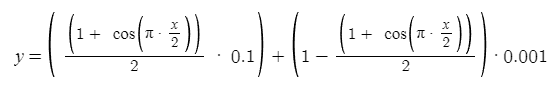

In [ ]:
def cosine_decay(epoch):
    if epochs > 1:
        w = (1 + math.cos(epoch / (epochs-1) * math.pi)) / 2
    else:
        w = 1
    return w * lr_start + (1 - w) * lr_end

In [ ]:
lr_start = 0.1 
lr_end = 0.001
epochs = 10 # epochs in one cycle

modified_lr = []
lr = 0.1
for e in range(50):
    lr = cosine_decay(e)
    modified_lr.append(lr)
value=np.array(modified_lr)
plt.plot(range(50), value)
plt.title("cosine lr decay",  fontsize=20)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('learning rate', fontsize=16)
plt.show()

<a id="5"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">5. Exponential Decay Learning Rate</p>
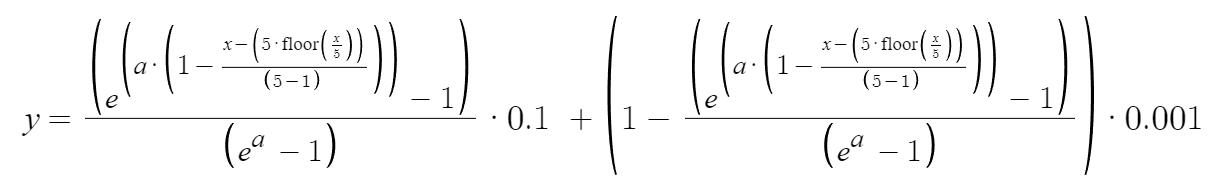

In [ ]:
def exponential_decay(epoch):
    a = 3
    epochs_per_cycle = epochs // CYCLES
    epoch_in_cycle = epoch % epochs_per_cycle
    if epochs_per_cycle > 1:
        v = math.exp(a * (1 - epoch_in_cycle / (epochs_per_cycle-1)))
        w = (v - 1) / (math.exp(a) - 1)
    else:
        w = 1
    return w * lr_start + (1 - w) * lr_end

In [ ]:
lr_start = 0.1 
lr_end = 0.001
epochs = 50 # Total no of epochs 
CYCLES = 10 # Total no of cycles we want in whole training ( total no restart )
a = 4 

modified_lr = []
lr = 0.1
for e in range(50):
    lr = exponential_decay(e)
    modified_lr.append(lr)
value=np.array(modified_lr)
plt.plot(range(50), value)
plt.title("exponential lr decay",  fontsize=20)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('learning rate', fontsize=16)
plt.show()

<p style="font-family:newtimeroman;font-size:120%;color:#444160;"><b><i>a</i></b> defines how steep the decay in learning rate will be. If <b><i>a</i></b> is higher decay is more steeper.<br>
Below we will plot the graph of epoch vs learning rate for various value of <b><i>a</i></b>.</p>

In [ ]:
lr_start = 0.1 
lr_end = 0.001
epochs = 50 # Total no of epochs 
CYCLES = 10 # Total no of cycles we want in whole training ( total no restart )

color_list = ["red","pink","green", "blue", "cyan","magenta","black","orange","violet","indigo"]

def exponential_decay(epoch):
    epochs_per_cycle = epochs // CYCLES
    epoch_in_cycle = epoch % epochs_per_cycle
    if epochs_per_cycle > 1:
        v = math.exp(a * (1 - epoch_in_cycle / (epochs_per_cycle-1)))
        w = (v - 1) / (math.exp(a) - 1)
    else:
        w = 1
    return w * lr_start + (1 - w) * lr_end

plt.figure(figsize=(20,8))
for i,a in enumerate(range(1,5)):
    modified_lr = []
    lr = 0.1
    for e in range(50):
        lr = exponential_decay(e)
        modified_lr.append(lr)
    value=np.array(modified_lr)
    plt.plot(range(50), value, color=color_list[i], label=f"a={a}")
plt.title("exponential lr decay",  fontsize=20)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('learning rate', fontsize=16)
plt.legend(loc="upper right")
plt.show()

<a id="6"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">6. Something Interesting</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">Here I will be doing something which I found quite interesting. So far in cosine decay and exponential decay , at the start of new cycle, lr has been shooting to all the way up which was set up in starting i.e. [start_lr], though this works but as we progress in training it is better to restrict more abrupt changes in weights, what I mean to say is as we approach global optimal point it is good to make small moves i.e. keep learning rate small.<br>
This idea is inspired from this paper: <a href="https://arxiv.org/pdf/1803.05407.pdf">https://arxiv.org/pdf/1803.05407.pdf</a><br>
So what we will do is we will bring a damping effect, which will progressively restrict the range of learning rate. Also we don't want to restrict it in midway of lr_start and lr_end but rather we want to skew the dampness towards lr_end .i.e. smaller lr. [ Because ultimately we want to slow down abrupt changes in weights]. <br>
Now how to direct the dampness towards lr_end. For this I will use a simple yet powerful idea.<br>
It states:<br>
<code>Let we have to reach some place A which is at distance x. At each step we travel half of the remaining distance. Then no matter how much steps we take in that direction we would never be able to reach A.</code><br> This is known as <a href=" https://en.wikipedia.org/wiki/Zeno%27s_paradoxes">Zeno's paradox</a>.<br>
So what I have done is set lr_end=0 and at the start of each cycle, I have redefined lr_end and lr_start.<br>
lr_start is 2/3 of distance from previous lr_start<br>
lr_end is 1/3 of distance between 0 and new lr_start<br>
In each cycle lr_start moves down and so lr_end moves closer to 0 but it never reacher 0. (It is asymptotic to 0)<br>
[Note: I am yet to train models with this learningRateScheduler. If any one uses it, let me know how it performs]</p>


<a id="7"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">7. Damped Cosine Decay Learning Rate</p>

In [ ]:
def cosine_decay(epoch):
    if epochs > 1:
        w = (1 + math.cos(epoch / (epochs-1) * math.pi)) / 2
    else:
        w = 1
    return w * lr_start1 + (1 - w) * lr_end1

def damped_cosine_decay(epoch):
    global lr_start, lr_end
    if epoch/(epochs-1) == epoch // (epochs-1) :
        # at the start of cycle  
        lr_start = lr_end + (lr_start-lr_end)*(1/3)
        #lr_end = lr_start- lr_start*2/3 
        lr_end = lr_start- (lr_start-0)*2/3 
    if epochs > 1:
        w = (1 + math.cos(epoch / (epochs-1) * math.pi)) / 2
    else:
        w = 1
    return w * lr_start + (1 - w) * lr_end

In [ ]:
lr_start1 = 0.1 
lr_end1 = 0.001

lr_start = 0.1 
lr_end = 0 #0.001
epochs = 10 

modified_lr_damped = []
modified_lr= []
lr = 0.1
for e in range(50):
    lr = cosine_decay(e)
    damped_lr = damped_cosine_decay(e)
    modified_lr_damped.append(damped_lr)
    modified_lr.append(lr)
value=np.array(modified_lr)
value_damped = np.array(modified_lr_damped)
plt.plot(range(50), value, label="cosine decay")
plt.plot(range(50), value_damped, label="damped cosine decay")
plt.title("damped cosine lr decay",  fontsize=20)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('learning rate', fontsize=16)
plt.legend(loc="upper right")
plt.show()

<a id="8"></a>
# <p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">8. Damped Exponential Decay Learning Rate</p>

In [ ]:
def damped_exponential_decay(epoch):
    global lr_start, lr_end
    a = 3
    epochs_per_cycle = epochs // CYCLES
    epoch_in_cycle = epoch % epochs_per_cycle
    if epoch_in_cycle == 0:
        # at start of new cycle 
        lr_start = lr_end + (lr_start-lr_end)*(1/3)
        lr_end = lr_start- lr_start*4/7 
    if epochs_per_cycle > 1:
        v = math.exp(a * (1 - epoch_in_cycle / (epochs_per_cycle-1)))
        w = (v - 1) / (math.exp(a) - 1)
    else:
        w = 1
    return w * lr_start + (1 - w) * lr_end

In [ ]:
lr_start = 0.1 
lr_end = 0
temp_lr_start = 0.1 
temp_lr_end = 0 #0.0001

epochs = 50 # Total no of epochs 
CYCLES = 10 # Total no of cycles we want in whole training ( total no restart )
a = 4 

modified_lr = []
lr = 0.1
for e in range(50):
    lr = damped_exponential_decay(e)
    modified_lr.append(lr)
value=np.array(modified_lr)
print("printing the last three learning rate values",value[-3:])
plt.plot(range(50), value)
plt.title("damped exponential lr decay",  fontsize=20)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('learning rate', fontsize=16)
plt.show()

<a id="9"></a>
<p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Conclusion</p>
<p style="font-family:newtimeroman;font-size:120%;color:#444160;">There are many other types of LearingRateSchedulers which I am still leanrning. If you have any suggestion do let me know in the comment.<br>
Let's give credit where it is due.<br>
cosine decay is inspired from work of <a href="https://www.kaggle.com/dlaststark">dlaststark</a> check out his <a href="https://www.kaggle.com/code/dlaststark/tps-may22-what-tf-again">notebook.</a><br>
exponential decay is inspired from work of <a href="https://www.kaggle.com/ambrosm">ambrosm</a> check out his <a href="https://www.kaggle.com/code/ambrosm/amex-keras-quickstart-1-training/notebook">notebook.</a><br>
Some other good references:-<br>
<a href="https://paperswithcode.com/method/cosine-annealing">https://paperswithcode.com/method/cosine-annealing</a><br>   
<a href="https://keras.io/api/callbacks/learning_rate_scheduler/">https://keras.io/api/callbacks/learning_rate_scheduler/</a><br>
<a href="https://arxiv.org/abs/1803.05407">https://arxiv.org/abs/1803.05407</a>   
</p> 

**<span style="color:#444160;"> Thanks!</span>**
<a id="10"></a>
<p style="background-color:#a96a50;font-family:newtimeroman;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">End</p>
    <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>